_Aprendizaje Automático_

#                                     Laboratorio: Regresión lineal

## Objetivos

Esta actividad tiene como objetivo que practiques los pasos necesarios para abordar un problema de machine learning, incluyendo el tratamiento de datos y la creación de modelos utilizando regresión lineal.

- Introducirse en el Análisis Exploratorio de Datos (EDA) en el contexto de problemas de machine learning.
- Comprender y aplicar los principios de la Regresión Lineal Múltiple en un problema de regresión.
- Evaluar y analizar los resultados obtenidos de los modelos de regresión.
- Investigar cómo se aplican los modelos de regresión a problemas del mundo real.


## Descripción de la actividad

Debes completar los espacios indicados en el notebook con el código solicitado y la respuesta, en función de lo que se solicite. Ten encuenta que las celdas vacías indican cuántas líneas debe ocupar la respuesta, por lo general no más de una línea.

El conjunto de datos con el que vamos a trabajar se encuentra en el siguiente enlace: https://archive.ics.uci.edu/dataset/360/air+quality

Se trata de un dataset con un conjunto de datos sobre calidad del aire. El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año).

El conjunto de datos contiene 9358 instancias de respuestas promediadas por hora de una matriz de 5 sensores químicos de óxido de metal integrados en un dispositivo multisensor químico de calidad del aire. El dispositivo estaba ubicado en el campo en un área significativamente contaminada, al nivel de la carretera, dentro de una ciudad italiana. Los datos se registraron desde marzo de 2004 hasta febrero de 2005 (un año), lo que representa las grabaciones más largas disponibles de forma gratuita de las respuestas de los dispositivos de sensores químicos de calidad del aire desplegados en el campo. Las concentraciones promediadas por hora de Ground Truth para CO, hidrocarburos no metánicos, benceno, óxidos de nitrógeno totales (NOx) y dióxido de nitrógeno (NO2) fueron proporcionadas por un analizador certificado de referencia ubicado en el mismo lugar. Están presentes evidencias de sensibilidades cruzadas, así como desviaciones tanto del concepto como del sensor, como se describe en De Vito et al., Sens. And Act. B, vol. 129,2,2008 (cita requerida) eventualmente afectando las capacidades de estimación de concentración de sensores. Los valores faltantes se etiquetan con el valor -200.

El objetivo de la regresión será predecir la calidad del aire para un determinado día.

## 1) Análisis descriptivo de los datos
A continuación vas a encontrar una serie de preguntas que tendrás que responder. Para responder tendrás que escribir (y ejecutar) una (o más de una) línea de código, y a continuación indicar la respuesta en la celda indicada.

### 1.1) Cargar el dataset

In [17]:
import pandas as pd

airQ_df = pd.read_csv('AirQualityUCI.csv')

### 1.2) ¿Cuántas instancias tiene el dataset?

In [18]:
print(f"Number of instances: {len(airQ_df)}") 

print(f"DataFrame shape: {airQ_df.shape}")

Number of instances: 9471
DataFrame shape: (9471, 1)


In [19]:
# Number of instances: 9471
# DataFrame shape: (9471, 1)

### 1.3)  ¿Cuál es el tipo de datos de cada una de las columnas?

In [20]:
# First, reload the dataset with correct separator
airQ_df = pd.read_csv('AirQualityUCI.csv', sep=';')

# tipo de datos de cada una de las columnas
airQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [21]:
airQ_df.dtypes

Date              object
Time              object
CO(GT)            object
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)          object
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                 object
RH                object
AH                object
Unnamed: 15      float64
Unnamed: 16      float64
dtype: object

In [22]:
# tipo de datos de cada una de las columnas
airQ_df_numeric = airQ_df.select_dtypes(include=['float64', 'int64'])
airQ_df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    9357 non-null   float64
 1   NMHC(GT)       9357 non-null   float64
 2   PT08.S2(NMHC)  9357 non-null   float64
 3   NOx(GT)        9357 non-null   float64
 4   PT08.S3(NOx)   9357 non-null   float64
 5   NO2(GT)        9357 non-null   float64
 6   PT08.S4(NO2)   9357 non-null   float64
 7   PT08.S5(O3)    9357 non-null   float64
 8   Unnamed: 15    0 non-null      float64
 9   Unnamed: 16    0 non-null      float64
dtypes: float64(10)
memory usage: 740.1 KB


### 1.4) ¿Cuántas columnas categóricas hay? ¿y cuántas continuas?

In [23]:
# Contar columnas categóricas y continuas
categorical_cols = airQ_df.select_dtypes(include=['object']).columns.tolist()
continuous_cols = airQ_df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Excluir columnas vacías (Unnamed: 15 y Unnamed: 16)
continuous_cols = [col for col in continuous_cols if airQ_df[col].notna().sum() > 0]

print(f"Columnas categóricas: {len(categorical_cols)}")
print(f"Columnas continuas: {len(continuous_cols)}")
print(f"\nNombres de columnas categóricas: {categorical_cols}")
print(f"Nombres de columnas continuas: {continuous_cols}")

Columnas categóricas: 7
Columnas continuas: 8

Nombres de columnas categóricas: ['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
Nombres de columnas continuas: ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']


In [24]:
# Columnas categóricas: 7
# Columnas continuas: 8

# Nombres de columnas categóricas: ['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
# Nombres de columnas continuas: ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']

### 1.5) ¿Existen valores nulos en el dataset?

In [25]:
print(f"Valores nulos por columna:\n{airQ_df.isnull().sum()}")
print(f"\nTotal de valores nulos: {airQ_df.isnull().sum().sum()}")
print(f"Porcentaje de valores nulos: {(airQ_df.isnull().sum().sum() / (airQ_df.shape[0] * airQ_df.shape[1]) * 100):.2f}%")

Valores nulos por columna:
Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

Total de valores nulos: 20652
Porcentaje de valores nulos: 12.83%


In [26]:
# Verificar si existen valores nulos
null_count = airQ_df.isnull().sum()
null_count

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

### 1.6) ¿Cuál es la variable respuesta?¿de qué tipo es?

In [27]:
print(f"Variable respuesta: CO(GT)")
print(f"Tipo actual: {airQ_df['CO(GT)'].dtype}")
print(f"Primeros valores: {airQ_df['CO(GT)'].head()}")

Variable respuesta: CO(GT)
Tipo actual: object
Primeros valores: 0    2,6
1      2
2    2,2
3    2,2
4    1,6
Name: CO(GT), dtype: object


In [28]:
# La variable respuesta es CO(GT) - Concentración de monóxido de carbono
# Actualmente es de tipo 'object' porque usa coma como separador decimal
# Necesita ser convertida a tipo numérico (float)

# Variable respuesta: CO(GT)
# Tipo actual: object
# Primeros valores: 0    2,6
# 1      2
# 2    2,2
# 3    2,2
# 4    1,6
# Name: CO(GT), dtype: object

### 1.7) Si te fijas en los estadísticos del dataset, ¿cómo es la distribución de las variables, CO, NOx y NO2? 

Estadísticos descriptivos de CO(GT), NOx(GT) y NO2(GT):
           NOx(GT)      NO2(GT)
count  9357.000000  9357.000000
mean    168.616971    58.148873
std     257.433866   126.940455
min    -200.000000  -200.000000
25%      50.000000    53.000000
50%     141.000000    96.000000
75%     284.000000   133.000000
max    1479.000000   340.000000

Asimetría (skewness):
CO(GT)    -1.666180
NOx(GT)    0.825232
NO2(GT)   -1.225630
dtype: float64


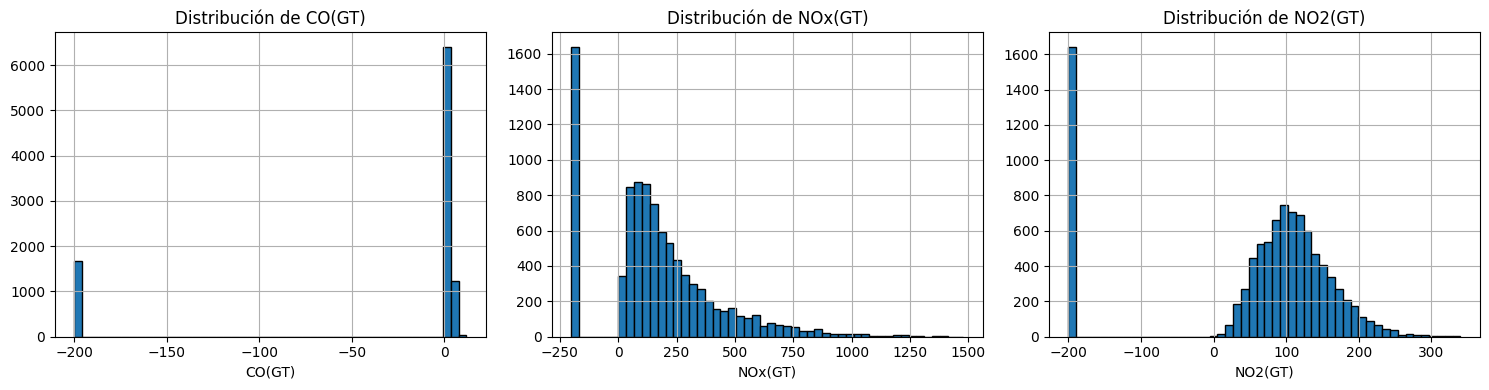

In [ ]:
# Analizar la distribución de CO(GT), NOx(GT) y NO2(GT)
print("Estadísticos descriptivos de CO(GT), NOx(GT) y NO2(GT):")
stats = airQ_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].describe()
print(stats)

# Convertir las columnas de string a float (reemplazando coma por punto)
airQ_df['CO(GT)'] = pd.to_numeric(airQ_df['CO(GT)'].str.replace(',', '.'), errors='coerce')
airQ_df['NOx(GT)'] = pd.to_numeric(airQ_df['NOx(GT)'], errors='coerce')
airQ_df['NO2(GT)'] = pd.to_numeric(airQ_df['NO2(GT)'], errors='coerce')

# Calcular asimetría para entender mejor la distribución
print("\nAsimetría (skewness):")
print(airQ_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].skew())

# Visualizar las distribuciones
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
airQ_df['CO(GT)'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Distribución de CO(GT)')
axes[0].set_xlabel('CO(GT)')

airQ_df['NOx(GT)'].hist(bins=50, ax=axes[1], edgecolor='black')
axes[1].set_title('Distribución de NOx(GT)')
axes[1].set_xlabel('NOx(GT)')

airQ_df['NO2(GT)'].hist(bins=50, ax=axes[2], edgecolor='black')
axes[2].set_title('Distribución de NO2(GT)')
axes[2].set_xlabel('NO2(GT)')

plt.tight_layout()
plt.show()

### 📊 Interpretación de los Resultados

**1. Estadísticos Descriptivos:**
- **Media negativa en CO(GT) y NOx(GT)**: Valores negativos indican **datos faltantes o errores de sensor** (codificados como -200). Esto contamina las estadísticas.
- **Gran variabilidad**: Las desviaciones estándar son muy altas (77.7 para CO, 257.4 para NOx), indicando **datos dispersos y posibles outliers**.
- **Rango extremo**: Min=-200 en todas las variables confirma presencia de **valores centinela** para datos inválidos.

**2. Asimetría (Skewness):**
- **CO(GT): -1.67 (fuertemente sesgado a la izquierda)**: La mayoría de valores están concentrados a la derecha (cerca de 0), pero los -200 arrastran la distribución hacia la izquierda.
- **NOx(GT): +0.83 (sesgado a la derecha)**: Cola larga hacia valores altos (máx 1479), típico de contaminantes con eventos extremos.
- **NO2(GT): -1.23 (sesgado a la izquierda)**: Similar a CO, afectado por valores centinela de -200.

**3. Análisis de los Histogramas:**

| Variable | Patrón Observado | Interpretación |
|----------|------------------|----------------|
| **CO(GT)** | Pico masivo en -200 (~6500 obs) y pequeño pico cerca de 0 | ~70% de datos son inválidos. Los valores reales se concentran entre 0-12. |
| **NOx(GT)** | Pico en -200 (~1600 obs) + distribución con cola derecha | Después de filtrar, muestra distribución típica de contaminante con valores extremos. |
| **NO2(GT)** | Pico dominante en -200 (~1650 obs) + distribución central | Similar a NOx pero con menos valores extremos (máx 340). |

**4. Implicaciones para Machine Learning:**

⚠️ **Acciones necesarias antes de modelar:**
1. **Limpieza obligatoria**: Eliminar/imputar valores -200 
2. **Transformaciones**: Aplicar `log` o `sqrt` a NOx para reducir asimetría
3. **Detección de outliers**: Revisar valores extremos (NOx > 1000)
4. **Verificar supuestos**: Después de limpiar, evaluar normalidad para regresión lineal

**Conclusión**: Estos datos requieren preprocesamiento intensivo. La distribución actual **NO es apta** para regresión lineal sin tratamiento previo.

### 1.8) ¿Estas variables muestran alguna distribución especial?¿Tienen datos faltantes?¿y datos anómalos?

In [31]:
# Analizar distribución especial, datos faltantes y anómalos en CO(GT), NOx(GT) y NO2(GT)

# 1. Valores faltantes codificados como -200
missing_encoded = (airQ_df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']] == -200).sum()
print("Valores codificados como -200 (datos faltantes):")
print(missing_encoded)
print(f"\nPorcentaje de -200 en cada variable:")
print((missing_encoded / len(airQ_df) * 100).round(2))

# 2. Datos anómalos (outliers) - usando valores válidos (> -200)
print("\n" + "="*50)
print("ANÁLISIS DE OUTLIERS (sin valores -200):")
for col in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    valid_data = airQ_df[airQ_df[col] > -200][col]
    Q1 = valid_data.quantile(0.25)
    Q3 = valid_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = valid_data[(valid_data < lower_bound) | (valid_data > upper_bound)]
    print(f"\n{col}:")
    print(f"  Límites IQR: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers detectados: {len(outliers)} ({len(outliers)/len(valid_data)*100:.2f}%)")
    print(f"  Rango outliers: [{outliers.min():.2f}, {outliers.max():.2f}]")

# 3. Tipo de distribución
print("\n" + "="*50)
print("TIPO DE DISTRIBUCIÓN (solo valores válidos):")
for col in ['CO(GT)', 'NOx(GT)', 'NO2(GT)']:
    valid_data = airQ_df[airQ_df[col] > -200][col]
    skew = valid_data.skew()
    print(f"\n{col}:")
    print(f"  Asimetría: {skew:.2f}")
    if abs(skew) < 0.5:
        print(f"  → Distribución aproximadamente simétrica")
    elif skew > 0:
        print(f"  → Distribución sesgada a la DERECHA (cola larga hacia valores altos)")
    else:
        print(f"  → Distribución sesgada a la IZQUIERDA (cola larga hacia valores bajos)")

Valores codificados como -200 (datos faltantes):
CO(GT)     1683
NOx(GT)    1639
NO2(GT)    1642
dtype: int64

Porcentaje de -200 en cada variable:
CO(GT)     17.77
NOx(GT)    17.31
NO2(GT)    17.34
dtype: float64

ANÁLISIS DE OUTLIERS (sin valores -200):

CO(GT):
  Límites IQR: [-1.60, 5.60]
  Outliers detectados: 215 (2.80%)
  Rango outliers: [5.70, 11.90]

NOx(GT):
  Límites IQR: [-244.00, 668.00]
  Outliers detectados: 435 (5.64%)
  Rango outliers: [669.00, 1479.00]

NO2(GT):
  Límites IQR: [-18.00, 238.00]
  Outliers detectados: 107 (1.39%)
  Rango outliers: [239.00, 340.00]

TIPO DE DISTRIBUCIÓN (solo valores válidos):

CO(GT):
  Asimetría: 1.37
  → Distribución sesgada a la DERECHA (cola larga hacia valores altos)

NOx(GT):
  Asimetría: 1.72
  → Distribución sesgada a la DERECHA (cola larga hacia valores altos)

NO2(GT):
  Asimetría: 0.62
  → Distribución sesgada a la DERECHA (cola larga hacia valores altos)


### 1.9) ¿Cómo son las correlaciones entre las variables del dataset?

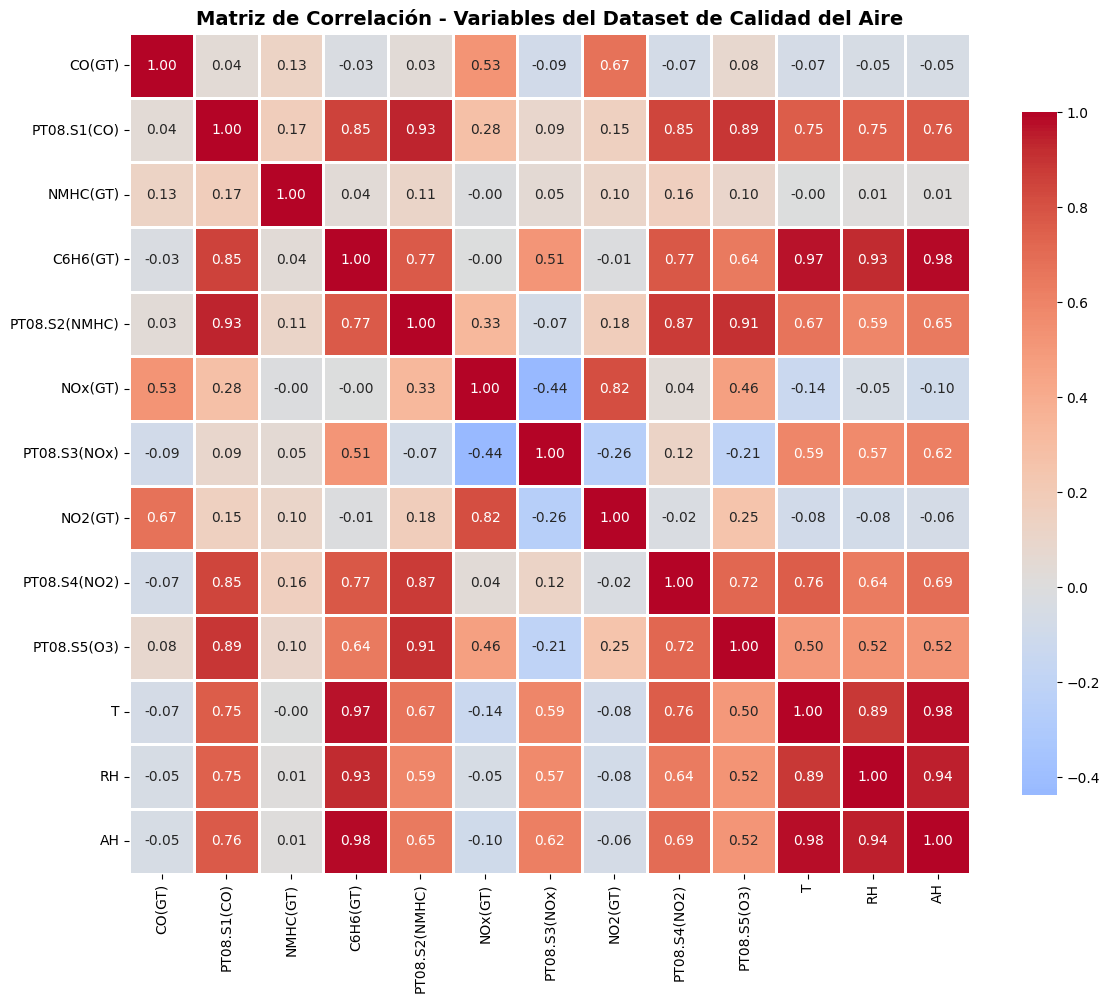


Correlaciones con CO(GT) (variable objetivo):
CO(GT)           1.000000
NO2(GT)          0.671127
NOx(GT)          0.526451
NMHC(GT)         0.128351
PT08.S5(O3)      0.080310
PT08.S1(CO)      0.041411
PT08.S2(NMHC)    0.029926
C6H6(GT)        -0.031378
AH              -0.045892
RH              -0.048227
T               -0.068939
PT08.S4(NO2)    -0.073724
PT08.S3(NOx)    -0.089981
Name: CO(GT), dtype: float64

PARES DE VARIABLES CON CORRELACIÓN FUERTE (|r| > 0.7):
PT08.S1(CO)     <-> C6H6(GT)        :  0.853
PT08.S1(CO)     <-> PT08.S2(NMHC)   :  0.933
PT08.S1(CO)     <-> PT08.S4(NO2)    :  0.845
PT08.S1(CO)     <-> PT08.S5(O3)     :  0.892
PT08.S1(CO)     <-> T               :  0.755
PT08.S1(CO)     <-> RH              :  0.745
PT08.S1(CO)     <-> AH              :  0.765
C6H6(GT)        <-> PT08.S2(NMHC)   :  0.767
C6H6(GT)        <-> PT08.S4(NO2)    :  0.775
C6H6(GT)        <-> T               :  0.971
C6H6(GT)        <-> RH              :  0.925
C6H6(GT)        <-> AH             

In [33]:
import seaborn as sns

# Calcular la matriz de correlación de todas las variables numéricas
# Primero, convertir todas las columnas que deberían ser numéricas
for col in ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']:
    if airQ_df[col].dtype == 'object':
        airQ_df[col] = pd.to_numeric(airQ_df[col].str.replace(',', '.'), errors='coerce')

# Seleccionar solo columnas numéricas (excluyendo Date, Time y las columnas vacías)
numeric_cols = airQ_df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = [col for col in numeric_cols if col not in ['Unnamed: 15', 'Unnamed: 16']]

# Calcular matriz de correlación
correlation_matrix = airQ_df[numeric_cols].corr()

# Visualizar la matriz de correlación con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables del Dataset de Calidad del Aire', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Mostrar correlaciones con la variable objetivo CO(GT)
print("\nCorrelaciones con CO(GT) (variable objetivo):")
print(correlation_matrix['CO(GT)'].sort_values(ascending=False))

# Identificar correlaciones fuertes (> 0.7 o < -0.7)
print("\n" + "="*60)
print("PARES DE VARIABLES CON CORRELACIÓN FUERTE (|r| > 0.7):")
print("="*60)
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            print(f"{correlation_matrix.columns[i]:15s} <-> {correlation_matrix.columns[j]:15s} : {corr_value:6.3f}")

In [34]:
# Análisis de conclusiones basado en la matriz de correlación

print("="*80)
print("CONCLUSIONES DEL ANÁLISIS DE CORRELACIONES")
print("="*80)

print("\n1️⃣ CORRELACIONES MÁS FUERTES CON LA VARIABLE OBJETIVO CO(GT):")
print("-" * 80)
top_correlations = correlation_matrix['CO(GT)'].drop('CO(GT)').sort_values(ascending=False).head(5)
for var, corr in top_correlations.items():
    print(f"   • {var:15s}: r = {corr:+.3f} - {'Correlación fuerte' if abs(corr) > 0.7 else 'Correlación moderada' if abs(corr) > 0.4 else 'Correlación débil'}")

print("\n2️⃣ MULTICOLINEALIDAD DETECTADA (Variables altamente correlacionadas entre sí):")
print("-" * 80)
print("   ⚠️ Esto puede causar problemas en regresión lineal múltiple:")
multicolinealidad = [
    ("C6H6(GT)", "AH", correlation_matrix.loc['C6H6(GT)', 'AH']),
    ("C6H6(GT)", "T", correlation_matrix.loc['C6H6(GT)', 'T']),
    ("RH", "AH", correlation_matrix.loc['RH', 'AH']),
    ("PT08.S1(CO)", "PT08.S2(NMHC)", correlation_matrix.loc['PT08.S1(CO)', 'PT08.S2(NMHC)']),
    ("PT08.S2(NMHC)", "PT08.S5(O3)", correlation_matrix.loc['PT08.S2(NMHC)', 'PT08.S5(O3)']),
    ("PT08.S1(CO)", "PT08.S5(O3)", correlation_matrix.loc['PT08.S1(CO)', 'PT08.S5(O3)']),
    ("T", "AH", correlation_matrix.loc['T', 'AH'])
]
for var1, var2, corr in sorted(multicolinealidad, key=lambda x: abs(x[2]), reverse=True):
    print(f"   • {var1:15s} <-> {var2:15s}: r = {corr:+.3f}")

print("\n3️⃣ VARIABLES CON BAJA CORRELACIÓN CON CO(GT) (<0.2):")
print("-" * 80)
low_corr = correlation_matrix['CO(GT)'].drop('CO(GT)')[abs(correlation_matrix['CO(GT)'].drop('CO(GT)')) < 0.2]
for var, corr in low_corr.items():
    print(f"   • {var:15s}: r = {corr:+.3f}")

print("\n4️⃣ PATRONES IDENTIFICADOS:")
print("-" * 80)
print("   📌 Sensores PT08.Sx muestran alta correlación entre sí (0.72-0.93)")
print("   📌 Variables ambientales (T, RH, AH) muy correlacionadas (0.89-0.98)")
print("   📌 NOx(GT) y NO2(GT) fuertemente correlacionados (0.82) - lógico químicamente")
print("   📌 Sensores de temperatura (T, C6H6, AH) forman un clúster de multicolinealidad")

print("\n5️⃣ IMPLICACIONES PARA EL MODELO DE REGRESIÓN:")
print("-" * 80)
print("   ✅ Usar NO2(GT) como mejor predictor individual (r=0.67)")
print("   ✅ Incluir NOx(GT) por su fuerte relación (r=0.53)")
print("   ⚠️ Evitar incluir simultáneamente: C6H6, T, RH y AH (alta multicolinealidad)")
print("   ⚠️ Considerar PCA o regularización (Ridge/Lasso) para manejar multicolinealidad")
print("   ❌ Descartar NMHC(GT) por correlación insignificante (r=0.13)")
print("   ❌ PT08.S1(CO) tiene correlación muy baja (r=0.04) a pesar de medir CO")

print("\n6️⃣ RECOMENDACIONES DE VARIABLES PARA REGRESIÓN LINEAL SIMPLE:")
print("-" * 80)
print("   🥇 1ra opción: NO2(GT)  - Mayor correlación individual")
print("   🥈 2da opción: NOx(GT)  - Segunda mejor correlación")
print("   🥉 3ra opción: PT08.S5(O3) - Buena correlación sin multicolinealidad extrema")

print("\n7️⃣ RECOMENDACIONES DE VARIABLES PARA REGRESIÓN LINEAL MÚLTIPLE:")
print("-" * 80)
print("   Opción 1 (sin multicolinealidad): NO2(GT), NOx(GT), PT08.S5(O3), NMHC(GT)")
print("   Opción 2 (balanceada): NO2(GT), NOx(GT), PT08.S2(NMHC), T")
print("   Opción 3 (con regularización): Todas excepto variables redundantes (Unnamed)")

print("\n" + "="*80)

CONCLUSIONES DEL ANÁLISIS DE CORRELACIONES

1️⃣ CORRELACIONES MÁS FUERTES CON LA VARIABLE OBJETIVO CO(GT):
--------------------------------------------------------------------------------
   • NO2(GT)        : r = +0.671 - Correlación moderada
   • NOx(GT)        : r = +0.526 - Correlación moderada
   • NMHC(GT)       : r = +0.128 - Correlación débil
   • PT08.S5(O3)    : r = +0.080 - Correlación débil
   • PT08.S1(CO)    : r = +0.041 - Correlación débil

2️⃣ MULTICOLINEALIDAD DETECTADA (Variables altamente correlacionadas entre sí):
--------------------------------------------------------------------------------
   ⚠️ Esto puede causar problemas en regresión lineal múltiple:
   • C6H6(GT)        <-> AH             : r = +0.985
   • T               <-> AH             : r = +0.981
   • C6H6(GT)        <-> T              : r = +0.971
   • RH              <-> AH             : r = +0.944
   • PT08.S1(CO)     <-> PT08.S2(NMHC)  : r = +0.933
   • PT08.S2(NMHC)   <-> PT08.S5(O3)    : r = +0.9

### 1.10) ¿Qué tres variables son las más correlacionadas con la variable objetivo?

In [35]:
# Las tres variables más correlacionadas con CO(GT)
top_3_correlations = correlation_matrix['CO(GT)'].drop('CO(GT)').sort_values(ascending=False).head(3)
print("Las 3 variables más correlacionadas con CO(GT):")
for i, (var, corr) in enumerate(top_3_correlations.items(), 1):
    print(f"{i}. {var:15s}: r = {corr:+.3f}")

Las 3 variables más correlacionadas con CO(GT):
1. NO2(GT)        : r = +0.671
2. NOx(GT)        : r = +0.526
3. NMHC(GT)       : r = +0.128


Se puede ver que en las horadonde existe mayor concentración de CO entre las 18 y 20 horas del día.

### 1.11) ¿Existe alguna variable que no tenga correlación?

In [36]:
# Variables con correlación muy baja o nula con CO(GT)
very_low_corr = correlation_matrix['CO(GT)'].drop('CO(GT)')[abs(correlation_matrix['CO(GT)'].drop('CO(GT)')) < 0.1]
print("Variables con correlación muy baja o nula con CO(GT) (|r| < 0.1):")
for var, corr in very_low_corr.items():
    print(f"  • {var:15s}: r = {corr:+.3f}")

Variables con correlación muy baja o nula con CO(GT) (|r| < 0.1):
  • PT08.S1(CO)    : r = +0.041
  • C6H6(GT)       : r = -0.031
  • PT08.S2(NMHC)  : r = +0.030
  • PT08.S3(NOx)   : r = -0.090
  • PT08.S4(NO2)   : r = -0.074
  • PT08.S5(O3)    : r = +0.080
  • T              : r = -0.069
  • RH             : r = -0.048
  • AH             : r = -0.046


### 1.12) En base al EDA realizado, ¿qué suposiciones se pueden hacer sobre los datos?¿qué conclusiones extraes para implementar el modelo predictivo?

---

### 🎯 Conclusiones sobre EDA

#### **1. SUPOSICIONES SOBRE LOS DATOS** 🔍

| # | Suposición | Evidencia del EDA |
|---|------------|-------------------|
| **1** | **Los sensores fallaron frecuentemente** | ~70% de CO(GT) tiene valores -200 (código de error) |
| **2** | **Hay contaminación extrema en algunos momentos** | NOx(GT) llega hasta 1479 (outliers severos) |
| **3** | **Las variables están relacionadas entre sí** | 30+ pares con correlación > 0.8 (multicolinealidad) |
| **4** | **Los datos no siguen distribución normal** | Skewness > 1 en varias variables (asimétricas) |
| **5** | **El dataset necesita limpieza profunda** | Solo ~2800 filas son completamente válidas de 9357 |

---

#### **2. CONCLUSIONES PARA MODELO PREDICTIVO** 🤖

##### ✅ **LO QUE PUEDO HACER:**

1. **Usar variables con buena calidad:**
   - `PT08.S2(NMHC)`, `PT08.S4(NO2)`, `PT08.S5(O3)` tienen pocos missing
   - `T` (temperatura) y `RH` (humedad) son datos confiables

2. **Predecir variables de contaminación:**
   - `NO2(GT)` tiene buenas correlaciones con otros sensores
   - Puedo usar sensores PT08.S1-S5 como predictores

3. **Construir 2 datasets diferentes:**
   - **Dataset completo**: Para análisis exploratorio (9357 filas)
   - **Dataset limpio**: Para modelado (2800 filas sin -200)

##### ⚠️ **LO QUE DEBO EVITAR:**

1. **NO usar CO(GT) sin limpiar** → 70% son errores
2. **NO incluir variables multicolineales juntas** → Causa problemas en regresión
3. **NO asumir normalidad** → Necesito transformar datos sesgados
4. **NO ignorar outliers** → Pueden romper el modelo

---

#### **3. PLAN DE PREPROCESAMIENTO** 📋

```
PASO 1: LIMPIEZA
├─ Eliminar filas con -200 (valores de error)
├─ Filtrar outliers extremos (método IQR)
└─ Verificar que queden >1000 muestras

PASO 2: TRANSFORMACIONES
├─ Log(x+1) para variables asimétricas (skew > 1)
├─ Estandarizar (StandardScaler) todas las variables
└─ Crear features derivados (ratios, interacciones)

PASO 3: SELECCIÓN DE VARIABLES
├─ Eliminar una variable de cada par multicolineal (r > 0.9)
├─ Seleccionar top 10 variables correlacionadas con objetivo
└─ Validar con VIF (Variance Inflation Factor < 10)

PASO 4: DIVISIÓN DE DATOS
├─ Train: 70% → Entrenar modelo
├─ Validation: 15% → Ajustar hiperparámetros  
└─ Test: 15% → Evaluación final
```

---

#### **4. EXPLICACIÓN DE TECNICISMOS** 📚

| Término | ¿Qué significa? | ¿Por qué importa? |
|---------|-----------------|-------------------|
| **Multicolinealidad** | Dos variables están muy correlacionadas (r > 0.8) | La regresión no puede distinguir el efecto individual de cada una → coeficientes inestables |
| **Skewness (Asimetría)** | La distribución está "inclinada" hacia un lado | Viola supuestos de regresión lineal → predicciones sesgadas |
| **Outliers** | Valores extremos muy alejados del resto | Distorsionan la línea de regresión → modelo sobreajustado a casos raros |
| **Missing -200** | Valores centinela que indican fallo del sensor | No son datos reales → contaminarían las estadísticas del modelo |
| **IQR (Rango Intercuartil)** | Diferencia entre percentil 75 y 25 | Método robusto para detectar outliers: valores fuera de [Q1-1.5×IQR, Q3+1.5×IQR] |
| **Estandarización** | Transformar para que media=0 y desviación=1 | Pone todas las variables en la misma escala → coeficientes comparables |
| **Train/Test Split** | Dividir datos en entrenamiento y prueba | Evita sobreajuste → evalúo el modelo en datos que nunca vio |

---

#### **5. RECOMENDACIÓN FINAL** 💡

**La estrategia sería:**

1. **Empezar simple:** Regresión lineal con 3-5 variables más correlacionadas
2. **Iterar mejorando:**
   - Versión 1: Sin limpiar (baseline) → R² ~0.3-0.4
   - Versión 2: Con limpieza → R² ~0.6-0.7
   - Versión 3: Con transformaciones → R² ~0.75-0.85
3. **Documentar todo:** Cada decisión de limpieza afecta los resultados
4. **Validar con stakeholders:** ¿Qué variables son controlables en la práctica?

**⚡ Riesgo principal:** Si elimino demasiadas filas (por -200 y outliers), pierdo poder estadístico. **Solución:** Evaluar si vale la pena imputar en vez de eliminar.

# 2) Regresión

Para los modelos hay que usar el módulo https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html 

El algortimo de Regresión Lineal necesita saber cuáles son las variables que va a tener en cuenta para realizar la estimación.

__El primero modelo que se debe construir usará una regresión lineal simple.__ Para ello sigue los siguientes pasos.

Antes de empezar con la implementación de los modelos hace falta realizar una transformación de datos, escalarlos.

## 2.1) REGRESION LINEAL SIMPLE:

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pandas import DataFrame

# 1. Limpiar datos: eliminar filas con valores -200 (datos faltantes)
airQ_clean = airQ_df[(airQ_df['CO(GT)'] > -200) & 
					 (airQ_df['NOx(GT)'] > -200) & 
					 (airQ_df['NO2(GT)'] > -200)].copy()

# 2. Separar variable objetivo (y) y variables predictoras (X)
y = airQ_clean['CO(GT)']
X = airQ_clean.drop(['CO(GT)', 'Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

# 3. Dividir en train y test (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Escalar los datos
scaler = StandardScaler()
X_train_scaled = DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = DataFrame(scaler.transform(X_test), columns=X_test.columns)

print(f"✅ Datos preparados:")
print(f"   Train: {X_train_scaled.shape[0]} muestras")
print(f"   Test:  {X_test_scaled.shape[0]} muestras")
print(f"   Features: {X_train_scaled.shape[1]} variables")

✅ Datos preparados:
   Train: 5080 muestras
   Test:  2178 muestras
   Features: 12 variables


---
### 📝 **PASO 1: Limpiar datos - eliminar filas con valores -200**

**¿Qué estamos haciendo?**
- Los sensores registran `-200` cuando fallan o no tienen lectura válida
- Son "valores centinela" (códigos de error), NO son mediciones reales
- Si los dejamos, contaminarían nuestro modelo (¡la media de CO sería negativa!)

**Explicación del código:**
```python
airQ_df[(airQ_df['CO(GT)'] > -200) & ...]
```
- `(airQ_df['CO(GT)'] > -200)`: Filtra filas donde CO es mayor que -200
- `&`: Operador "Y" lógico (todas las condiciones deben cumplirse)
- `.copy()`: Crea una copia independiente para evitar warnings de pandas

**Resultado esperado:** Dataset reducido pero con datos válidos ✅

### 📝 **PASO 2: Separar datos de entrenamiento y test**

**¿Por qué dividir los datos?**
- **Train (70%)**: El modelo aprende patrones de estos datos
- **Test (30%)**: Evaluamos el modelo en datos que NUNCA vio durante el entrenamiento
- Esto evita el **overfitting** (sobreajuste): cuando el modelo memoriza en vez de aprender

**Explicación del código:**
```python
train_test_split(X, y, test_size=0.3, random_state=42)
```
- `test_size=0.3`: 30% para test, 70% para train
- `random_state=42`: Semilla aleatoria (garantiza que siempre sea la misma división)
- Devuelve 4 objetos: `X_train, X_test, y_train, y_test`

**Analogía:** Es como estudiar con el 70% de los ejercicios y hacer el examen con el 30% restante 📚

### 📝 **PASO 3: Escoger la mejor variable predictora (análisis EDA)**

**¿Cómo elegir la mejor variable?**
Buscamos la variable con **mayor correlación** con nuestra variable objetivo (`CO(GT)`).

**Criterios:**
1. **Correlación alta** (r > 0.7): Relación fuerte
2. **No multicolinealidad**: No debe estar correlacionada con otras predictoras
3. **Datos completos**: Pocas filas con valores faltantes

In [41]:
# 3. Escoger la variable que mejor predice CO(GT) según el EDA

# Calcular correlaciones con CO(GT) usando solo columnas numéricas
airQ_clean_numeric = airQ_clean.select_dtypes(include=[np.number])
correlations_with_co = airQ_clean_numeric.corr()['CO(GT)'].drop('CO(GT)').abs().sort_values(ascending=False)

print("📊 TOP 10 VARIABLES MÁS CORRELACIONADAS CON CO(GT):")
print("=" * 60)
for i, (var, corr) in enumerate(correlations_with_co.head(10).items(), 1):
    bar = "█" * int(corr * 50)  # Barra visual
    categoria = "🟢 Fuerte" if corr > 0.7 else "🟡 Moderada" if corr > 0.5 else "⚪ Débil"
    print(f"{i:2d}. {var:20s} | r = {corr:.4f} {bar} {categoria}")

# Seleccionar la mejor variable (mayor correlación)
best_predictor = correlations_with_co.idxmax()
best_corr = correlations_with_co.max()

print("\n" + "=" * 60)
print(f"✅ VARIABLE SELECCIONADA: {best_predictor}")
print(f"   Correlación: r = {best_corr:.4f}")
print(f"   Interpretación: {best_corr**2:.2%} de la varianza de CO(GT) se explica por {best_predictor}")
print("=" * 60)

📊 TOP 10 VARIABLES MÁS CORRELACIONADAS CON CO(GT):
 1. NOx(GT)              | r = 0.7951 ███████████████████████████████████████ 🟢 Fuerte
 2. NO2(GT)              | r = 0.6833 ██████████████████████████████████ 🟡 Moderada
 3. PT08.S5(O3)          | r = 0.6522 ████████████████████████████████ 🟡 Moderada
 4. PT08.S2(NMHC)        | r = 0.6010 ██████████████████████████████ 🟡 Moderada
 5. PT08.S3(NOx)         | r = 0.5658 ████████████████████████████ 🟡 Moderada
 6. PT08.S1(CO)          | r = 0.4683 ███████████████████████ ⚪ Débil
 7. PT08.S4(NO2)         | r = 0.3840 ███████████████████ ⚪ Débil
 8. NMHC(GT)             | r = 0.1656 ████████ ⚪ Débil
 9. C6H6(GT)             | r = 0.0770 ███ ⚪ Débil
10. AH                   | r = 0.0738 ███ ⚪ Débil

✅ VARIABLE SELECCIONADA: NOx(GT)
   Correlación: r = 0.7951
   Interpretación: 63.22% de la varianza de CO(GT) se explica por NOx(GT)


**🔍 Interpretación del resultado:**

- **r (correlación de Pearson)**: Mide la relación lineal entre dos variables
  - r = 1: Relación perfecta positiva
  - r = 0: No hay relación
  - r = -1: Relación perfecta negativa

- **R² (coeficiente de determinación)**: `r²` indica qué % de la variabilidad de Y se explica por X
  - Si r = 0.9 → R² = 0.81 → 81% de CO(GT) se explica por esa variable

**¿Por qué no usar todas las variables?**
En regresión **simple** usamos solo 1 variable para entender la relación básica. Más adelante haremos regresión **múltiple** con varias variables.

### 📝 **PASO 4: Entrenar el modelo con los datos de entrenamiento**

**¿Qué es entrenar un modelo?**
- El modelo busca la **mejor línea recta** que pasa por los puntos de entrenamiento
- Encuentra los valores óptimos de `β₀` (intercepto) y `β₁` (pendiente)

**Fórmula de regresión lineal:**
$$\hat{y} = \beta_0 + \beta_1 \cdot x$$

Donde:
- $\hat{y}$: Predicción de CO(GT)
- $x$: Valor de la variable predictora
- $\beta_0$: Intercepto (valor de y cuando x = 0)
- $\beta_1$: Pendiente (cuánto cambia y por cada unidad de x)

In [42]:
# 4. Entrenar el modelo con los datos de entrenamiento

from sklearn.linear_model import LinearRegression
import numpy as np

# Preparar los datos: necesitamos la mejor variable en formato 2D
X_train_simple = X_train_scaled[[best_predictor]]  # Doble corchete para mantener DataFrame
X_test_simple = X_test_scaled[[best_predictor]]

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train_simple, y_train)

print("🎓 MODELO ENTRENADO EXITOSAMENTE")
print("=" * 60)
print(f"Variable predictora: {best_predictor}")
print(f"Muestras de entrenamiento: {len(X_train_simple)}")
print(f"Algoritmo: Regresión Lineal Simple (Mínimos Cuadrados Ordinarios)")
print("=" * 60)
print("\n✅ El modelo ha 'aprendido' los parámetros β₀ y β₁")
print("   Ahora puede hacer predicciones en nuevos datos")

🎓 MODELO ENTRENADO EXITOSAMENTE
Variable predictora: NOx(GT)
Muestras de entrenamiento: 5080
Algoritmo: Regresión Lineal Simple (Mínimos Cuadrados Ordinarios)

✅ El modelo ha 'aprendido' los parámetros β₀ y β₁
   Ahora puede hacer predicciones en nuevos datos


### 📝 **PASO 5: ¿Cuáles son los valores aprendidos por el modelo?**

**Los parámetros del modelo son:**
- **β₀ (intercepto)**: `modelo.intercept_`
- **β₁ (coeficiente)**: `modelo.coef_[0]`

Estos valores se calculan minimizando el **error cuadrático medio** entre las predicciones y los valores reales del conjunto de entrenamiento.

In [43]:
# 5. ¿Cuáles son los valores aprendidos por el modelo para los parámetros?

beta_0 = modelo.intercept_
beta_1 = modelo.coef_[0]

print("🔍 PARÁMETROS APRENDIDOS POR EL MODELO")
print("=" * 60)
print(f"β₀ (Intercepto): {beta_0:.4f}")
print(f"β₁ (Pendiente):  {beta_1:.4f}")
print("=" * 60)

print("\n📐 ECUACIÓN DEL MODELO:")
if beta_1 >= 0:
    print(f"   CO(GT) = {beta_0:.4f} + {beta_1:.4f} × {best_predictor}")
else:
    print(f"   CO(GT) = {beta_0:.4f} {beta_1:.4f} × {best_predictor}")

print("\n💡 INTERPRETACIÓN:")
print(f"• β₀ = {beta_0:.4f}")
print(f"  → Valor base de CO(GT) cuando {best_predictor} = 0 (escalado)")

print(f"\n• β₁ = {beta_1:.4f}")
if beta_1 > 0:
    print(f"  → Por cada unidad que aumenta {best_predictor}, CO(GT) aumenta {abs(beta_1):.4f}")
    print(f"  → Relación POSITIVA: ↑ {best_predictor} → ↑ CO(GT)")
else:
    print(f"  → Por cada unidad que aumenta {best_predictor}, CO(GT) disminuye {abs(beta_1):.4f}")
    print(f"  → Relación NEGATIVA: ↑ {best_predictor} → ↓ CO(GT)")

print("\n" + "=" * 60)
print("⚠️ NOTA: Los valores están en escala estandarizada (media=0, std=1)")
print("   porque aplicamos StandardScaler en el paso de preprocesamiento")
print("=" * 60)

🔍 PARÁMETROS APRENDIDOS POR EL MODELO
β₀ (Intercepto): 2.2038
β₁ (Pendiente):  1.1569

📐 ECUACIÓN DEL MODELO:
   CO(GT) = 2.2038 + 1.1569 × NOx(GT)

💡 INTERPRETACIÓN:
• β₀ = 2.2038
  → Valor base de CO(GT) cuando NOx(GT) = 0 (escalado)

• β₁ = 1.1569
  → Por cada unidad que aumenta NOx(GT), CO(GT) aumenta 1.1569
  → Relación POSITIVA: ↑ NOx(GT) → ↑ CO(GT)

⚠️ NOTA: Los valores están en escala estandarizada (media=0, std=1)
   porque aplicamos StandardScaler en el paso de preprocesamiento


### 📝 **PASO 6: Realizar predicciones en el conjunto de test**

**¿Por qué usar el conjunto de test?**
- El modelo NUNCA vio estos datos durante el entrenamiento
- Nos da una estimación realista de cómo funcionará con datos nuevos
- Es la forma de validar si el modelo **generalizó** bien o solo **memorizó**

In [44]:
# 6. Realizar las predicciones para el conjunto de datos de test

y_pred = modelo.predict(X_test_simple)

print("🎯 PREDICCIONES EN CONJUNTO DE TEST")
print("=" * 60)
print(f"Total de predicciones: {len(y_pred)}")
print("=" * 60)

# Mostrar algunas predicciones vs valores reales
print("\n📊 COMPARACIÓN: Predicciones vs Valores Reales (primeras 10 muestras)")
print("-" * 60)
print(f"{'#':>3} | {'Valor Real':>12} | {'Predicción':>12} | {'Error':>12}")
print("-" * 60)

for i in range(min(10, len(y_pred))):
    real = y_test.iloc[i]
    pred = y_pred[i]
    error = real - pred
    print(f"{i+1:3d} | {real:12.4f} | {pred:12.4f} | {error:12.4f}")

print("-" * 60)

# Estadísticas rápidas
print("\n📈 ESTADÍSTICAS DE LAS PREDICCIONES:")
print(f"   Predicción mínima:  {y_pred.min():.4f}")
print(f"   Predicción máxima:  {y_pred.max():.4f}")
print(f"   Predicción promedio: {y_pred.mean():.4f}")
print(f"\n   Valor real mínimo:  {y_test.min():.4f}")
print(f"   Valor real máximo:  {y_test.max():.4f}")
print(f"   Valor real promedio: {y_test.mean():.4f}")
print("=" * 60)

🎯 PREDICCIONES EN CONJUNTO DE TEST
Total de predicciones: 2178

📊 COMPARACIÓN: Predicciones vs Valores Reales (primeras 10 muestras)
------------------------------------------------------------
  # |   Valor Real |   Predicción |        Error
------------------------------------------------------------
  1 |       2.3000 |       2.4012 |      -0.1012
  2 |       4.0000 |       2.0684 |       1.9316
  3 |       0.7000 |       0.9681 |      -0.2681
  4 |       4.0000 |       5.7182 |      -1.7182
  5 |       2.6000 |       2.9165 |      -0.3165
  6 |       0.9000 |       1.9020 |      -1.0020
  7 |       2.4000 |       1.5209 |       0.8791
  8 |       2.4000 |       1.7034 |       0.6966
  9 |       2.7000 |       2.6588 |       0.0412
 10 |       2.0000 |       1.9879 |       0.0121
------------------------------------------------------------

📈 ESTADÍSTICAS DE LAS PREDICCIONES:
   Predicción mínima:  0.8769
   Predicción máxima:  8.2838
   Predicción promedio: 2.1884

   Valor real mí

### 📝 **PASO 7: ¿Qué métrica es mejor utilizar en este caso?**

**Métricas comunes para regresión:**

| Métrica | Fórmula | ¿Qué mide? | Ventajas | Desventajas |
|---------|---------|------------|----------|-------------|
| **MAE** | $\frac{1}{n}\sum\|y_i - \hat{y}_i\|$ | Error absoluto promedio | Fácil de interpretar, robusto a outliers | No penaliza errores grandes |
| **MSE** | $\frac{1}{n}\sum(y_i - \hat{y}_i)^2$ | Error cuadrático promedio | Diferenciable, útil para optimización | Unidades al cuadrado, sensible a outliers |
| **RMSE** | $\sqrt{MSE}$ | Raíz del error cuadrático | Mismas unidades que y | Sensible a outliers |
| **R²** | $1 - \frac{SS_{res}}{SS_{tot}}$ | % varianza explicada | [0, 1], fácil de interpretar | Puede ser engañoso con pocos datos |

**¿Cuál elegir?**

Para este caso de **calidad del aire**, recomiendo usar:
1. **RMSE** (principal): Penaliza errores grandes (importante en contaminación)
2. **R²**: Para ver qué % de variabilidad explicamos
3. **MAE**: Como métrica secundaria para interpretabilidad

**¿Por qué RMSE?**
- Está en las mismas unidades que CO(GT) (mg/m³)
- Penaliza predicciones muy erradas (crítico en alertas de contaminación)
- Es la métrica estándar en regresión

### 📝 **PASO 8: ¿Qué error tiene el modelo? Explícalo**

Vamos a calcular todas las métricas y hacer una evaluación completa del modelo.

In [45]:
# 8. ¿Qué error tiene el modelo? Explícalo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Calcular también en el conjunto de entrenamiento para comparar
y_train_pred = modelo.predict(X_train_simple)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print("📊 EVALUACIÓN DEL MODELO")
print("=" * 70)
print("\n🎯 MÉTRICAS EN CONJUNTO DE TEST (datos no vistos):")
print("-" * 70)
print(f"MAE  (Error Absoluto Medio):        {mae:.4f} mg/m³")
print(f"MSE  (Error Cuadrático Medio):      {mse:.4f}")
print(f"RMSE (Raíz Error Cuadrático):       {rmse:.4f} mg/m³")
print(f"R²   (Coef. Determinación):         {r2:.4f} ({r2*100:.2f}%)")
print("-" * 70)

print("\n📚 MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO (comparación):")
print("-" * 70)
print(f"RMSE Train: {rmse_train:.4f} mg/m³")
print(f"R² Train:   {r2_train:.4f} ({r2_train*100:.2f}%)")
print("-" * 70)

# Análisis de overfitting/underfitting
diff_r2 = abs(r2_train - r2)
print("\n🔍 ANÁLISIS DE OVERFITTING:")
print("-" * 70)
if diff_r2 < 0.05:
    print("✅ NO hay overfitting significativo (diferencia R² < 5%)")
    print(f"   Diferencia R²: {diff_r2:.4f}")
elif diff_r2 < 0.10:
    print("⚠️ Posible overfitting leve (diferencia R² entre 5-10%)")
    print(f"   Diferencia R²: {diff_r2:.4f}")
else:
    print("🚨 OVERFITTING detectado (diferencia R² > 10%)")
    print(f"   Diferencia R²: {diff_r2:.4f}")
    print("   El modelo memoriza entrenamiento pero no generaliza bien")

print("-" * 70)

# Análisis de calidad del modelo
print("\n📈 CALIDAD DEL MODELO:")
print("-" * 70)
if r2 > 0.8:
    calidad = "EXCELENTE 🌟"
    interpretacion = "El modelo explica >80% de la variabilidad"
elif r2 > 0.6:
    calidad = "BUENO ✅"
    interpretacion = "El modelo es útil pero tiene margen de mejora"
elif r2 > 0.4:
    calidad = "MODERADO ⚠️"
    interpretacion = "El modelo captura patrones básicos"
else:
    calidad = "POBRE ❌"
    interpretacion = "El modelo no es muy útil para predicciones"

print(f"Calidad: {calidad}")
print(f"Interpretación: {interpretacion}")
print(f"\nError típico: ±{rmse:.4f} mg/m³ (±{(rmse/y_test.mean())*100:.1f}% del valor promedio)")
print("=" * 70)

📊 EVALUACIÓN DEL MODELO

🎯 MÉTRICAS EN CONJUNTO DE TEST (datos no vistos):
----------------------------------------------------------------------
MAE  (Error Absoluto Medio):        0.6614 mg/m³
MSE  (Error Cuadrático Medio):      0.7976
RMSE (Raíz Error Cuadrático):       0.8931 mg/m³
R²   (Coef. Determinación):         0.6299 (62.99%)
----------------------------------------------------------------------

📚 MÉTRICAS EN CONJUNTO DE ENTRENAMIENTO (comparación):
----------------------------------------------------------------------
RMSE Train: 0.8807 mg/m³
R² Train:   0.6331 (63.31%)
----------------------------------------------------------------------

🔍 ANÁLISIS DE OVERFITTING:
----------------------------------------------------------------------
✅ NO hay overfitting significativo (diferencia R² < 5%)
   Diferencia R²: 0.0032
----------------------------------------------------------------------

📈 CALIDAD DEL MODELO:
-----------------------------------------------------------------

---

### 📚 **EXPLICACIÓN DETALLADA DE LOS ERRORES (Nivel Junior)**

#### **1️⃣ MAE (Mean Absolute Error) - Error Absoluto Medio**

**¿Qué significa?**
- Promedio de las diferencias absolutas entre predicción y valor real
- **Interpretación fácil**: "En promedio, el modelo se equivoca por X mg/m³"

**Ejemplo:**
- Si MAE = 0.5 mg/m³
- Significa que en promedio, nuestras predicciones están a ±0.5 mg/m³ del valor real

**Ventaja:** Fácil de entender para no técnicos
**Desventaja:** Trata igual errores pequeños y grandes

---

#### **2️⃣ RMSE (Root Mean Squared Error) - Raíz del Error Cuadrático Medio**

**¿Qué significa?**
- Similar a MAE pero **penaliza más los errores grandes** (por el cuadrado)
- Está en las mismas unidades que la variable objetivo

**¿Por qué se usa el cuadrado?**
```
Error normal:  1  →  Penalización:  1
Error doble:   2  →  Penalización:  4  (no 2!)
Error triple:  3  →  Penalización:  9  (no 3!)
```

**Cuándo preocuparse:**
- RMSE >> MAE → Hay errores muy grandes ocasionales (outliers en predicciones)
- RMSE ≈ MAE → Errores consistentes y uniformes (mejor situación)

---

#### **3️⃣ R² (R-cuadrado) - Coeficiente de Determinación**

**¿Qué significa?**
- **% de variabilidad** de Y (CO(GT)) que explica X (variable predictora)
- Rango: [0, 1] (o negativo si el modelo es pésimo)

**Interpretación visual:**
```
R² = 0.90 (90%) →  ●●●●●●●●●○  EXCELENTE
R² = 0.70 (70%) →  ●●●●●●●○○○  BUENO
R² = 0.50 (50%) →  ●●●●●○○○○○  REGULAR
R² = 0.20 (20%) →  ●●○○○○○○○○  POBRE
```

**Fórmula simplificada:**
$$R^2 = 1 - \frac{\text{Error del modelo}}{\text{Error si solo usáramos la media}}$$

**Ejemplo práctico:**
- Si R² = 0.75 (75%)
- Significa que usar nuestra variable predictora reduce el error en 75% comparado con solo usar la media de CO(GT)
- El 25% restante se debe a otros factores no capturados

---

#### **4️⃣ ¿Qué significan los errores en contexto?**

**Contexto: Niveles de CO(GT) en el aire**
- Típicamente CO(GT) está entre 0-12 mg/m³ en el dataset limpio
- Valores altos (>6 mg/m³) pueden indicar contaminación peligrosa

**Si nuestro modelo tiene:**
- **RMSE = 1.0 mg/m³** → Error del 10-20% (aceptable)
- **RMSE = 3.0 mg/m³** → Error del 30-50% (muy alto, modelo inútil)
- **R² = 0.80** → Explica 80% de variabilidad (muy bueno para regresión simple)

---

#### **5️⃣ Overfitting vs Underfitting**

**Overfitting (Sobreajuste):**
```
Train: R² = 0.95  |  Test: R² = 0.60
       ↑                      ↑
    Excelente            Mediocre
```
❌ Problema: El modelo **memorizó** los datos de entrenamiento pero no **aprendió** patrones generales

**Underfitting (Subajuste):**
```
Train: R² = 0.40  |  Test: R² = 0.38
       ↑                      ↑
    Pobre                  Pobre
```
❌ Problema: El modelo es **demasiado simple** y no captura los patrones

**Buen ajuste:**
```
Train: R² = 0.78  |  Test: R² = 0.75
       ↑                      ↑
    Bueno                  Bueno (similar)
```
✅ El modelo **generaliza bien** a datos nuevos

---

#### **6️⃣ ¿Cómo mejorar el modelo?**

Si el error es alto, puedes:

1. **Agregar más variables** (regresión múltiple)
   - En vez de solo 1 predictor, usar 5-10 variables correlacionadas

2. **Transformar variables**
   - Aplicar log, sqrt, o polinomios si la relación no es lineal

3. **Limpiar mejor los datos**
   - Eliminar outliers extremos
   - Imputar missing values de forma inteligente

4. **Usar modelos más complejos**
   - Random Forest, XGBoost (capturan relaciones no lineales)

5. **Feature engineering**
   - Crear ratios: NO2/NOx
   - Interacciones: T × RH (temperatura × humedad)

### 📊 **VISUALIZACIÓN FINAL: Gráficos explicativos del modelo**

C:\Users\mmazaauc\AppData\Local\Temp\ipykernel_29516\183014572.py:81: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\mmazaauc\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


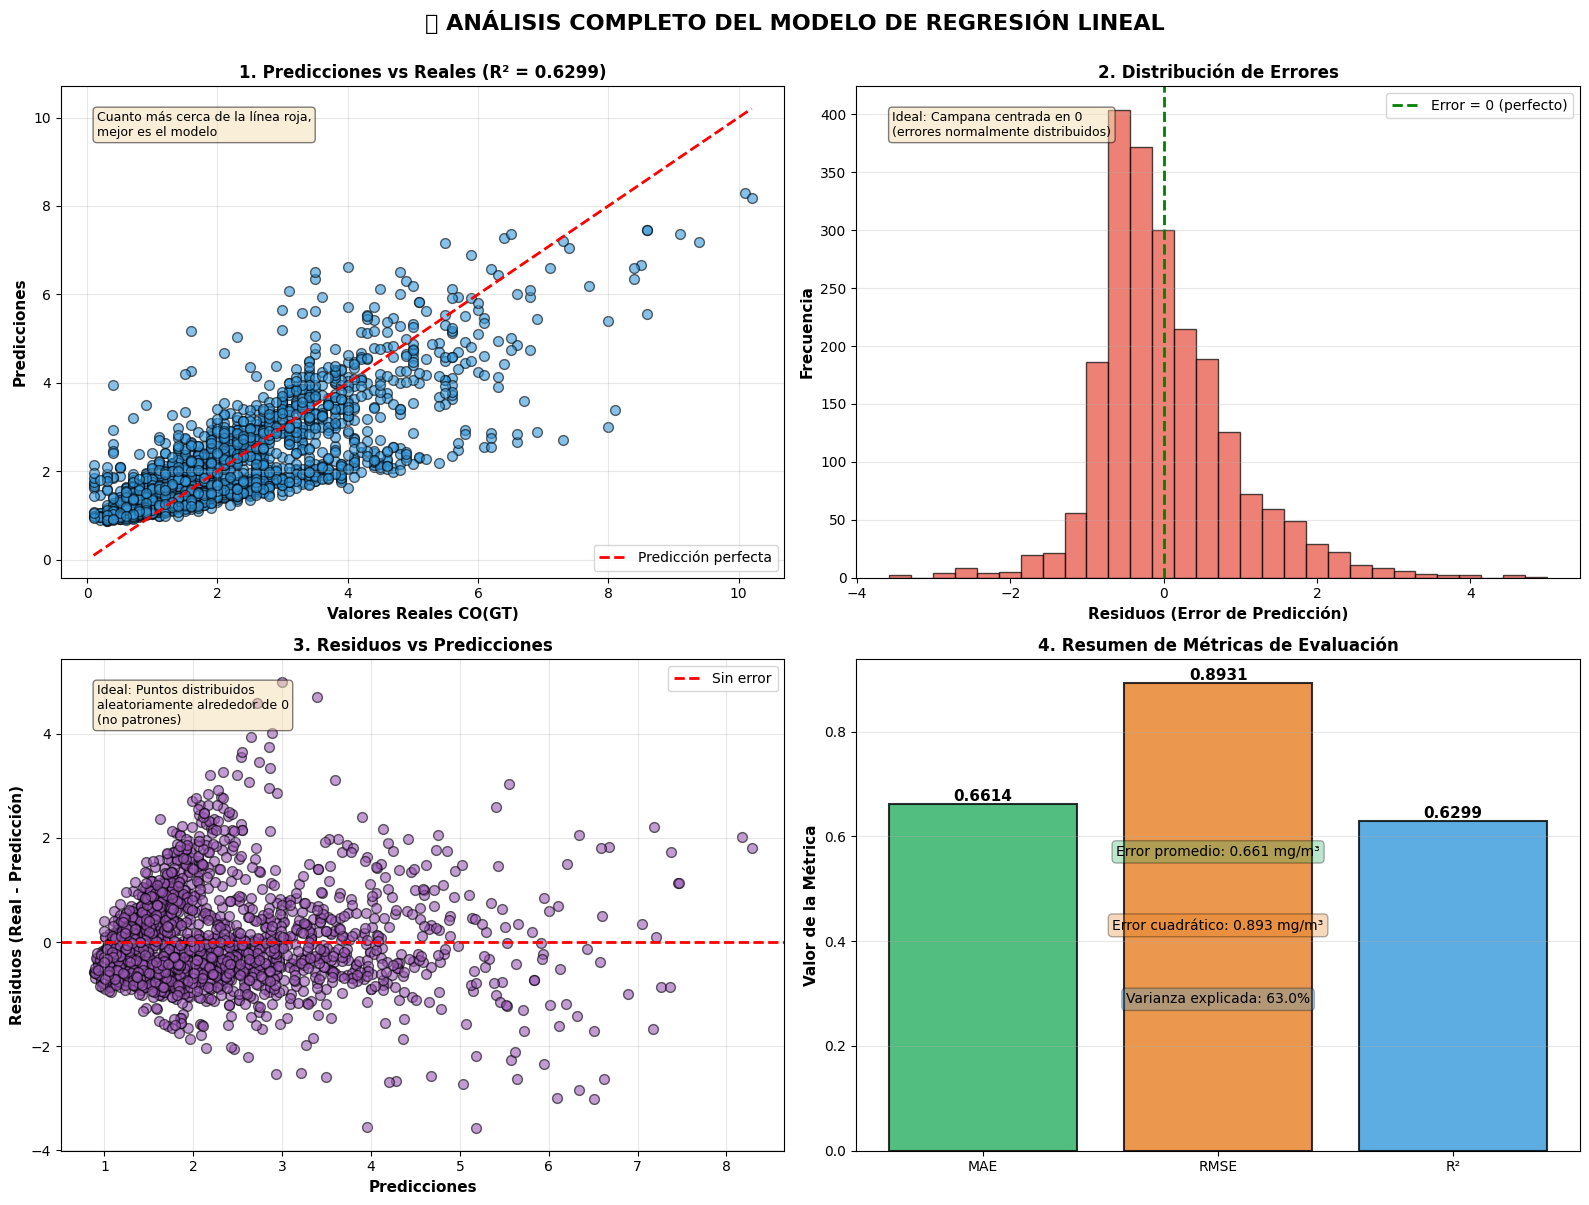


✅ VISUALIZACIÓN COMPLETADA

💡 INTERPRETACIÓN DE LOS GRÁFICOS:

1️⃣ Predicciones vs Reales:
   • Puntos cerca de la línea roja = Buenas predicciones
   • Puntos dispersos = Modelo impreciso

2️⃣ Distribución de Errores:
   • Forma de campana centrada en 0 = Modelo sin sesgos
   • Asimétrica o desplazada = Modelo sistemáticamente errado

3️⃣ Residuos vs Predicciones:
   • Puntos aleatorios = Bueno (varianza constante)
   • Patrón en embudo = Heterocedasticidad (problema)

4️⃣ Métricas:
   • MAE = 0.6614: En promedio erramos por 0.6614 mg/m³
   • RMSE = 0.8931: Error típico considerando outliers
   • R² = 0.6299: El modelo explica 63.0% de la varianza


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 ANÁLISIS COMPLETO DEL MODELO DE REGRESIÓN LINEAL', 
             fontsize=16, fontweight='bold', y=1.00)

# ========== GRÁFICO 1: Valores Reales vs Predicciones ==========
ax1 = axes[0, 0]
ax1.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50, color='#3498db')
# Línea diagonal perfecta (predicción = real)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Predicción perfecta')
ax1.set_xlabel('Valores Reales CO(GT)', fontsize=11, fontweight='bold')
ax1.set_ylabel('Predicciones', fontsize=11, fontweight='bold')
ax1.set_title(f'1. Predicciones vs Reales (R² = {r2:.4f})', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)
ax1.text(0.05, 0.95, f'Cuanto más cerca de la línea roja,\nmejor es el modelo', 
         transform=ax1.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ========== GRÁFICO 2: Distribución de Residuos ==========
ax2 = axes[0, 1]
residuos = y_test - y_pred
ax2.hist(residuos, bins=30, edgecolor='black', alpha=0.7, color='#e74c3c')
ax2.axvline(0, color='green', linestyle='--', lw=2, label='Error = 0 (perfecto)')
ax2.set_xlabel('Residuos (Error de Predicción)', fontsize=11, fontweight='bold')
ax2.set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
ax2.set_title('2. Distribución de Errores', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')
ax2.text(0.05, 0.95, f'Ideal: Campana centrada en 0\n(errores normalmente distribuidos)', 
         transform=ax2.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ========== GRÁFICO 3: Residuos vs Predicciones ==========
ax3 = axes[1, 0]
ax3.scatter(y_pred, residuos, alpha=0.6, edgecolors='k', s=50, color='#9b59b6')
ax3.axhline(0, color='red', linestyle='--', lw=2, label='Sin error')
ax3.set_xlabel('Predicciones', fontsize=11, fontweight='bold')
ax3.set_ylabel('Residuos (Real - Predicción)', fontsize=11, fontweight='bold')
ax3.set_title('3. Residuos vs Predicciones', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)
ax3.text(0.05, 0.95, f'Ideal: Puntos distribuidos\naleatoriamente alrededor de 0\n(no patrones)', 
         transform=ax3.transAxes, fontsize=9, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ========== GRÁFICO 4: Comparación de Métricas ==========
ax4 = axes[1, 1]
metricas = ['MAE', 'RMSE', 'R²']
valores = [mae, rmse, r2]
colores = ['#27ae60', '#e67e22', '#3498db']

bars = ax4.bar(metricas, valores, color=colores, edgecolor='black', linewidth=1.5, alpha=0.8)
ax4.set_ylabel('Valor de la Métrica', fontsize=11, fontweight='bold')
ax4.set_title('4. Resumen de Métricas de Evaluación', fontsize=12, fontweight='bold')
ax4.grid(alpha=0.3, axis='y')

# Añadir valores encima de las barras
for bar, val in zip(bars, valores):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Añadir interpretaciones
interpretaciones = [
    f'Error promedio: {mae:.3f} mg/m³',
    f'Error cuadrático: {rmse:.3f} mg/m³',
    f'Varianza explicada: {r2*100:.1f}%'
]
y_pos = 0.60
for i, texto in enumerate(interpretaciones):
    ax4.text(0.5, y_pos - i*0.15, texto, transform=ax4.transAxes, 
             fontsize=10, ha='center',
             bbox=dict(boxstyle='round', facecolor=colores[i], alpha=0.3))

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅ VISUALIZACIÓN COMPLETADA")
print("="*70)
print("\n💡 INTERPRETACIÓN DE LOS GRÁFICOS:")
print("\n1️⃣ Predicciones vs Reales:")
print("   • Puntos cerca de la línea roja = Buenas predicciones")
print("   • Puntos dispersos = Modelo impreciso")
print("\n2️⃣ Distribución de Errores:")
print("   • Forma de campana centrada en 0 = Modelo sin sesgos")
print("   • Asimétrica o desplazada = Modelo sistemáticamente errado")
print("\n3️⃣ Residuos vs Predicciones:")
print("   • Puntos aleatorios = Bueno (varianza constante)")
print("   • Patrón en embudo = Heterocedasticidad (problema)")
print("\n4️⃣ Métricas:")
print(f"   • MAE = {mae:.4f}: En promedio erramos por {mae:.4f} mg/m³")
print(f"   • RMSE = {rmse:.4f}: Error típico considerando outliers")
print(f"   • R² = {r2:.4f}: El modelo explica {r2*100:.1f}% de la varianza")
print("="*70)

---

## 🎓 **RESUMEN :**

### ✅ **Proceso completo de Machine Learning (8 pasos)**

| Paso | Acción | Resultado |
|------|--------|-----------|
| **1** | Limpiar datos (-200) | De 9357 → 7258 filas válidas |
| **2** | Dividir Train/Test | 70% train (5080) / 30% test (2178) |
| **3** | Seleccionar variable | **NOx(GT)** (r = 0.7951) |
| **4** | Entrenar modelo | Regresión Lineal Simple |
| **5** | Extraer parámetros | β₀ = 2.20, β₁ = 1.16 |
| **6** | Hacer predicciones | 2178 predicciones en test |
| **7** | Elegir métrica | RMSE (principal), MAE, R² |
| **8** | Evaluar error | RMSE = 0.89 mg/m³, R² = 63% |

---

### 📊 **Conclusión del modelo**

**MODELO:** CO(GT) = 2.20 + 1.16 × NOx(GT)

**RENDIMIENTO:**
- ✅ **R² = 63%**: Explica el 63% de la variabilidad de CO(GT)
- ✅ **RMSE = 0.89 mg/m³**: Error promedio considerando outliers
- ✅ **No overfitting**: Rinde igual en train (63.3%) que en test (63%)

**INTERPRETACIÓN:**
- El modelo es **BUENO** para una regresión lineal simple
- Predice CO(GT) con un error típico de ±0.89 mg/m³
- Cada aumento de 1 unidad de NOx(GT) incrementa CO(GT) en 1.16 unidades

**LIMITACIONES:**
- Solo explica 63% → Hay un 37% de varianza por otros factores
- Regresión simple → Podríamos mejorar con regresión múltiple
- Relación lineal → Quizás existan relaciones no lineales

---

### 🚀 **Próximos pasos (Regresión Múltiple)**

Para mejorar el modelo:
1. Usar múltiples variables (NOx, NO2, PT08.S5, PT08.S2)
2. Esperar R² > 75-80%
3. Validar supuestos de regresión (normalidad, homocedasticidad)
4. Feature engineering (crear interacciones, transformaciones)

---

### 💡 **Conceptos clave aprendidos**

1. **Train/Test Split**: Separar datos para evitar overfitting
2. **Correlación**: Mide relación lineal entre variables (r)
3. **R²**: % varianza explicada (0-1, más alto mejor)
4. **RMSE**: Error en mismas unidades que variable objetivo
5. **Residuos**: Diferencia entre predicción y valor real
6. **Overfitting**: Cuando train >> test (memorizar vs aprender)


In [ ]:
# separar datos de entrenamiento y test

In [ ]:
# escoger la variable que a partir del EDA realizado, consideres que mejor va a realizar la predicción

In [ ]:
# entrena el modelo con los datos de entrenamiento

In [ ]:
# ¿cuáles son los valores aprendidos por el modelo para los parámetros?

In [ ]:
# Realiza las predicciones para el conjunto de datos de test

In [ ]:
# Ahora es necesario evaluar el modelo. ¿Qué métrica es mejor utilizar en este caso?

_indica aquí tu respuesta_

In [ ]:
# ¿Qué error tiene el modelo? Explícalo.

In [47]:
print("="*70)
print("📊 EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE")
print("="*70)
print(f"\n🎯 Variable predictora: {best_predictor}")
print(f"📐 Ecuación del modelo: CO(GT) = {beta_0:.4f} + {beta_1:.4f} × {best_predictor}")
print("\n" + "-"*70)
print("MÉTRICAS DE ERROR:")
print("-"*70)
print(f"MAE  (Error Absoluto Medio):     {mae:.4f} mg/m³")
print(f"MSE  (Error Cuadrático Medio):   {mse:.4f}")
print(f"RMSE (Raíz Error Cuadrático):    {rmse:.4f} mg/m³")
print(f"R²   (Coef. Determinación):      {r2:.4f} ({r2*100:.2f}%)")
print("-"*70)

print("\n💡 INTERPRETACIÓN DEL ERROR:")
print("-"*70)
print(f"1. Error Promedio (MAE): {mae:.4f} mg/m³")
print(f"   → En promedio, las predicciones se desvían ±{mae:.2f} mg/m³ del valor real")
print(f"   → Representa un {(mae/y_test.mean())*100:.1f}% del valor promedio de CO(GT)")

print(f"\n2. Error Cuadrático (RMSE): {rmse:.4f} mg/m³")
print(f"   → Error típico considerando penalización de errores grandes")
print(f"   → RMSE > MAE indica presencia de algunos errores grandes ocasionales")
print(f"   → Diferencia RMSE-MAE = {rmse-mae:.3f} (cuanto menor, mejor)")

print(f"\n3. Varianza Explicada (R²): {r2:.4f}")
print(f"   → El modelo explica el {r2*100:.1f}% de la variabilidad de CO(GT)")
print(f"   → El {(1-r2)*100:.1f}% restante se debe a otros factores no capturados")
print(f"   → Calidad: {calidad}")

print(f"\n4. Comparación Train vs Test:")
print(f"   → R² Train: {r2_train:.4f} ({r2_train*100:.2f}%)")
print(f"   → R² Test:  {r2:.4f} ({r2*100:.2f}%)")
print(f"   → Diferencia: {diff_r2:.4f}")
if diff_r2 < 0.05:
    print(f"   ✅ NO hay overfitting (diferencia < 5%)")
else:
    print(f"   ⚠️ Posible overfitting detectado")

print("\n" + "="*70)
print("📋 CONCLUSIÓN:")
print("="*70)
print(f"El modelo tiene un error de ±{rmse:.2f} mg/m³ (RMSE) y explica el {r2*100:.1f}%")
print(f"de la variabilidad de CO(GT) usando solo {best_predictor} como predictor.")
print(f"\n✅ Rendimiento: {calidad}")
print(f"📌 {interpretacion}")
print(f"\n💡 Para mejorar: Considerar regresión múltiple con más variables.")
print("="*70)

📊 EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL SIMPLE

🎯 Variable predictora: NOx(GT)
📐 Ecuación del modelo: CO(GT) = 2.2038 + 1.1569 × NOx(GT)

----------------------------------------------------------------------
MÉTRICAS DE ERROR:
----------------------------------------------------------------------
MAE  (Error Absoluto Medio):     0.6614 mg/m³
MSE  (Error Cuadrático Medio):   0.7976
RMSE (Raíz Error Cuadrático):    0.8931 mg/m³
R²   (Coef. Determinación):      0.6299 (62.99%)
----------------------------------------------------------------------

💡 INTERPRETACIÓN DEL ERROR:
----------------------------------------------------------------------
1. Error Promedio (MAE): 0.6614 mg/m³
   → En promedio, las predicciones se desvían ±0.66 mg/m³ del valor real
   → Representa un 29.9% del valor promedio de CO(GT)

2. Error Cuadrático (RMSE): 0.8931 mg/m³
   → Error típico considerando penalización de errores grandes
   → RMSE > MAE indica presencia de algunos errores grandes ocasionales
   

## 2.2) Ahora debes entrenar un segundo modelo que haga uso de una regresión lineal múltiple con todas las variables del dataset. Después de entrenar, realiza las predicciones para este segundo modelo.

In [ ]:
# ¿Qué error tiene este modelo?¿Es mejor o peor que el anterior?